# **Лаба 3 упражнение 1**

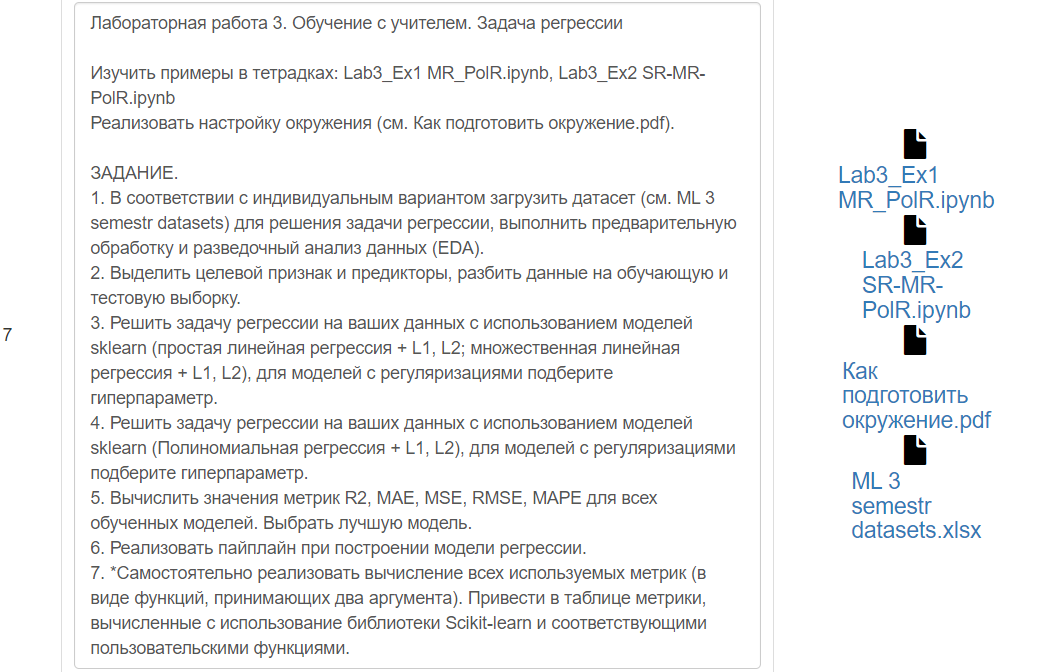

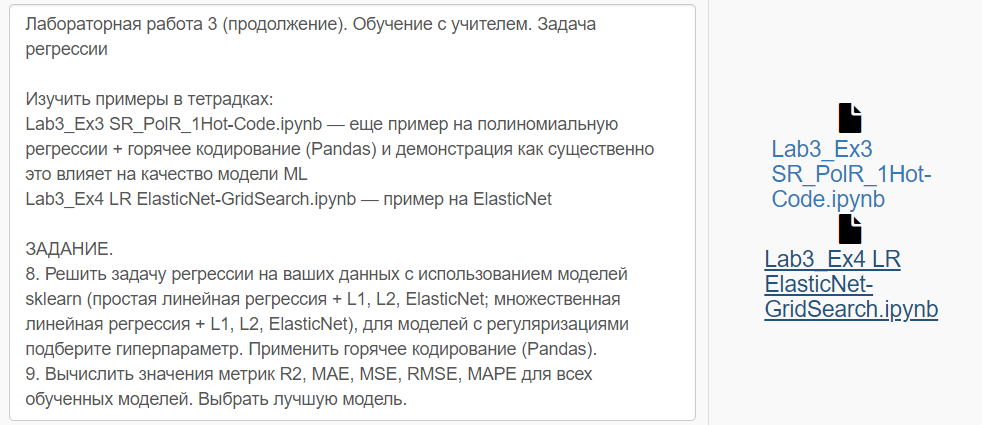

In [1]:
# Сделаю предупреждение невидимым, вылезает при использовании кодировщика BinaryEncoder, в этой библиотеке используют метод iscathegorical вместо isinstance,
# что и вызывает предупреждение
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from category_encoders.binary import BinaryEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from math import sqrt
import matplotlib.pyplot as plt

## **Предобработка**

In [2]:
df = pd.read_csv(r"../../data/Lab3/Ex1/cars.csv")
pd.set_option('display.max_columns', None)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.00,True,Минская обл.,5,85,False,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.00,True,Брестская обл.,4,20,False,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.00,False,Минская обл.,3,63,False,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.00,True,Брестская обл.,7,156,False,True,False,False,False,False,False,False,False,True,490


Проверим наличие пропусков и заполним их

In [3]:
df.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [4]:
df[df["engine_capacity"].isna()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,hatchback,False,owned,front,14900.0,True,Минская обл.,11,13,False,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,hatchback,False,owned,front,16000.0,False,Минская обл.,18,1,False,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,liftback,False,owned,front,12950.0,True,Минская обл.,21,5,False,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,hatchback,False,owned,front,13850.0,False,Минская обл.,20,57,False,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,hatchback,False,owned,front,9300.0,True,Минская обл.,7,21,False,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,hatchback,False,owned,front,12900.0,False,Минская обл.,12,7,False,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,hatchback,False,owned,front,14500.0,False,Минская обл.,12,19,False,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,hatchback,False,owned,front,15500.0,False,Брестская обл.,5,2,False,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,hatchback,False,owned,rear,24750.0,True,Минская обл.,23,17,False,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,liftback,False,owned,rear,39999.0,False,Минская обл.,6,2,False,True,True,True,True,True,True,True,True,True,57


Видим, что незаполненные значения в столбце engine capacity есть только у электрических автомобилей, заполним пропуски значением 0, так как камер сгорания в них нет и объём двигателя равен нулю. 

In [5]:
df["engine_capacity"].fillna(0, inplace=True)

Для применения регрессии необходимо сделать все данные числовыми. Воспользуемся кодировщиком LabelBinarizer

In [6]:
bin = BinaryEncoder()
binarized_categorical = bin.fit_transform(df.select_dtypes(include="object")).astype("int8")
data = df.select_dtypes(exclude="object")
data = pd.concat([data, pd.DataFrame(binarized_categorical)], axis=1)
data
# d = bin.inverse_transform(df.iloc[:, 1:7]) так можно раскодировать, надо передать закодированные столбцы

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2
0,190000,2010,False,2.5,False,10900.00,False,9,13,False,True,True,True,False,True,False,True,True,True,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,False,True,False,False,True,True,False,False,False,True,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,False,True,False,False,False,False,False,False,True,True,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,True,False,False,False,False,False,False,False,False,False,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,False,True,False,True,True,False,False,False,False,True,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,False,True,False,False,True,True,False,False,True,True,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,False,True,False,False,True,True,False,False,True,True,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,False,True,False,False,True,True,False,False,True,True,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,False,True,False,False,False,False,False,False,False,True,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1


Сконвертируем тип данных bool в int8 и можем приступать

In [7]:
temp = data.select_dtypes(include="bool").astype("int8")
data = data.select_dtypes(exclude="bool")
data = pd.concat([data, temp], axis=1)
data

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1
1,290000,2002,3.0,5000.00,12,54,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1
2,402000,2001,2.5,2800.00,4,72,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1
3,10000,1999,3.0,9999.00,9,42,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,5,85,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38527,321000,2004,2.2,4800.00,4,20,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38528,777957,2000,3.5,4300.00,3,63,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1
38529,20000,2001,2.0,4000.00,7,156,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1


## **Простая линейная регрессия**

Сдэлаем пайплайн.

In [8]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
    ]
)

Выделим целевой признак и предиктор.

In [9]:
y = pd.DataFrame(data["price_usd"])
x = pd.DataFrame(data["odometer_value"])

Разделим данные.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Обучим модель.

In [11]:
lr = pipeline.fit(X_train, y_train)

Получим прогноз.

In [12]:
y_pred = pd.DataFrame(lr.predict(X_test))

Оценим модель по графику.

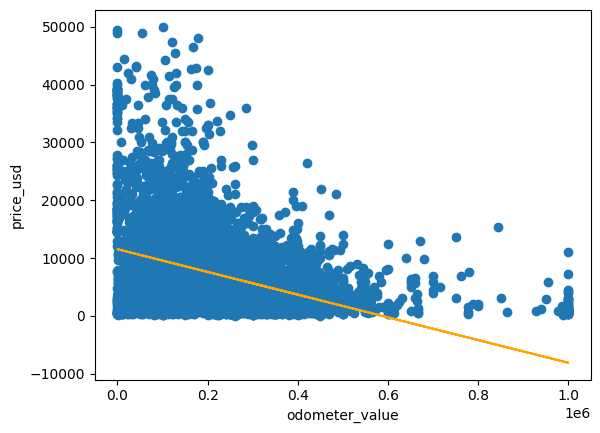

In [13]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Данные сильно разбросаны, линейной регрессией невозможно добиться большой точности прогноза.

Посмотрим на метрики.

In [14]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 4089.7980872073563
MSE: 35083632.03265488
RMSE: 5923.143762619213
MAPE: 2.979556178442623
R^2: 0.18361733548142334


Коэффициент детерминации очень низкий, модель очень сильно ошибается, а согласно метрике MAPE в среднем ошибка составляет 550%  (насколько я понял из исходного кода библиотеки scikit-learn - эта метрика выдаёт не проценты, а обычную долю).

Теперь проделаем то же самое с регуляризацией.

Сделаем пайплайн для лассо и найдём наилучшие параметры с помощью поиска по сетке.

In [15]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params
# pd.DataFrame(gridsearch.cv_results_)
# вопрос по интерпретации этой штуки. Что за столбцы split0, ... , splitn и почему в них разные числа, если датафрейм ранее уже был разделён на
# тренировочную и тестовую выборки? Может, gridsearch сам делит их на train и тест?


{'model__alpha': 1.0}

Обучим модель с регуляризацией лассо и наилучшим параметром. (он при каждом запуске получается разный)

MAE: 4089.780805933391
MSE: 35086240.102437034
RMSE: 5923.363917778228
MAPE: 2.980403687964278
R^2: 0.1835566466976617


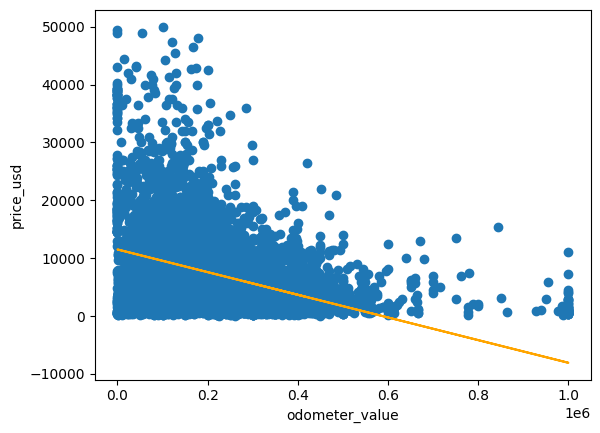

In [16]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Теперь найдём лучший параметр для ridge

In [17]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 1.0}

И подставим его в пайплайн.

MAE: 4089.7859569826414
MSE: 35085278.95804168
RMSE: 5923.282785587878
MAPE: 2.9800949784328914
R^2: 0.18357901215918893


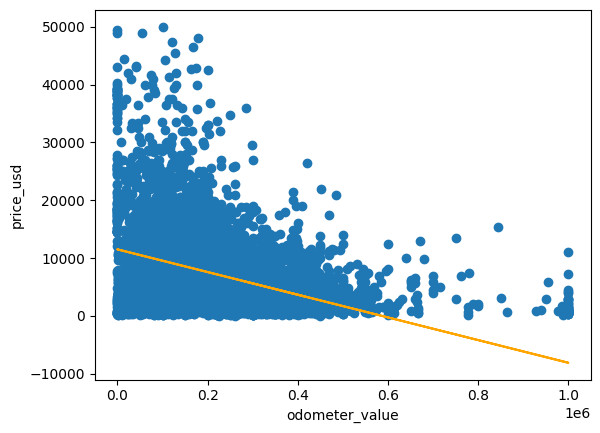

In [18]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

Теперь попробуем ElasticNet

In [19]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)

Подберём гиперпараметр l1_ratio

In [20]:
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.9}

Подставим его в пайплайн

MAE: 4157.18686556133
MSE: 36259998.42402328
RMSE: 6021.627556070142
MAPE: 3.115914212274567
R^2: 0.15624374063407265


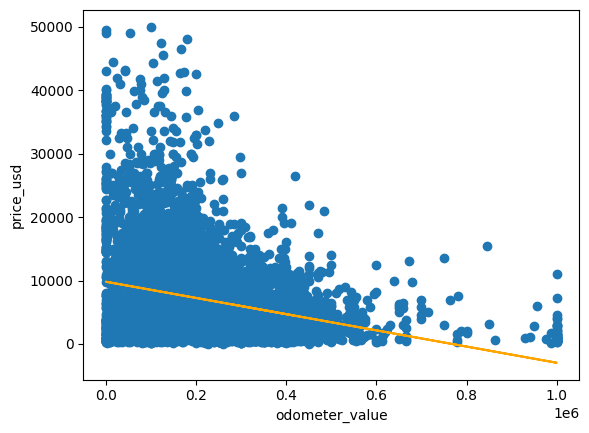

In [21]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, c="orange")
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.show()

С регуляризацией и поиском параметров по сетке не удалось получить значительных изменений точности модели. Вывод - нужно больше предикторов, либо выбрать другой.

## **Множественная линейная регрессия**

Выделим целевой признак - цена в долларах

In [22]:
y = data["price_usd"]
x = data.drop("price_usd", axis=1)

Разделим данные на обучающую и тестовую выборки

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Сделаем пайплайн.

In [24]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", LinearRegression()),
    ]
)

Обучим модель

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

Посмотрим коэффициенты и метрики

In [26]:
pipeline.named_steps["model"].coef_

array([-5.02508317e+03,  2.63541140e+04,  7.39642881e+03,  5.31181591e+03,
       -1.26281393e+03,  3.62852779e+03, -1.40611340e+03, -1.22283590e+03,
       -3.69638444e+02, -3.29348394e+02,  4.22264944e+02,  5.99620848e+02,
        2.58927454e+03,  1.79517682e+03,  1.47338129e+03,  4.75374385e+02,
        3.35035873e+01,  5.93755237e+02, -2.12778126e+02, -8.99173718e+01,
        2.88091662e+02, -1.83323763e+02,  5.00320065e+01,  9.30713490e+16,
        9.30713490e+16,  6.63415617e+02,  3.36059237e+02,  1.68697293e+02,
       -6.49985288e+01, -4.48903104e+16, -4.48903104e+16, -4.48903104e+16,
        4.48903104e+16,  4.90500000e+03,  1.14800000e+03,  4.56000000e+02,
        8.48000000e+02, -9.20000000e+01,  1.08840000e+04,  1.21580000e+04,
       -2.04800000e+03,  1.16200000e+03, -3.32000000e+02, -2.95125000e+02,
       -2.40000000e+01,  3.00000000e+01,  9.20000000e+02, -2.56000000e+02,
        3.44500000e+02, -6.80000000e+02,  4.22000000e+02,  7.64000000e+02,
        2.80000000e+01,  

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2145.4034059945507
MSE: 11644826.347656764
RMSE: 3412.451662317983
MAPE: 0.7351170632335318
R^2: 0.7179991240809256


Получился неплохой коэффициент детерминации, а также по остальным метрикам модель справилась намного лучше, чем одномерная линейная регрессия.

Попробуем с регуляризацией и поиском по сетке.

Lasso.

In [29]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso(tol=1e-1)),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params


{'model__alpha': 0.2}

In [30]:
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.021318,0.084443,0.010702,0.001858,0.2,{'model__alpha': 0.2},0.727719,0.741673,0.730157,0.733731,0.726395,0.731935,0.005472,1
1,2.379047,0.057497,0.010805,0.001519,0.4,{'model__alpha': 0.4},0.727619,0.741618,0.730176,0.733735,0.726360,0.731902,0.005473,2
2,1.904649,0.041684,0.011732,0.003387,0.6,{'model__alpha': 0.6000000000000001},0.727488,0.741540,0.730145,0.733732,0.726312,0.731844,0.005478,3
3,1.636450,0.045958,0.011028,0.002469,0.8,{'model__alpha': 0.8},0.727338,0.741441,0.730087,0.733704,0.726287,0.731771,0.005474,4
4,1.392354,0.061396,0.009446,0.001273,1.0,{'model__alpha': 1.0},0.727152,0.741316,0.730019,0.733660,0.726271,0.731683,0.005464,5


Если не увеличить параметр tol в Lasso, то выдаются предупреждения о том, что оптимизация не сходится и код выполняется очень долго.

<font size=30> Правильно ли я понял? Правильно ли я сделал? Снизу скрины ошибок

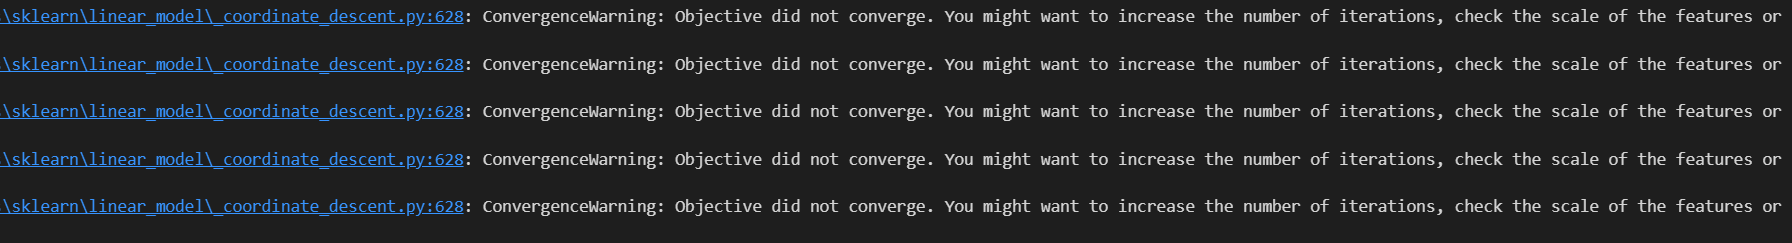

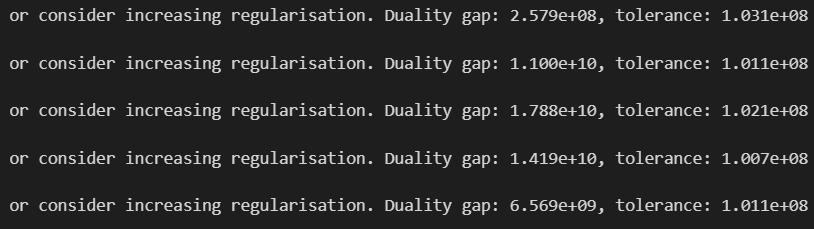

Подставим гиперпараметр в lasso

In [31]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')


MAE: 2139.8721344894575
MSE: 11636252.879296422
RMSE: 3411.1952273794623
MAPE: 0.7283674807703658
R^2: 0.7182067463773085


Теперь найдём гиперпараметр для ridge и подставим его.

In [32]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 1.0}

In [33]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2140.1629270375
MSE: 11632857.79840605
RMSE: 3410.6975530536342
MAPE: 0.7265032820180705
R^2: 0.7182889645020205


Попробуем ElasticNet

In [34]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__l1_ratio": np.arange(0.2, 1, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__l1_ratio': 0.8}

In [35]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

MAE: 2889.4453338870303
MSE: 20850033.475991413
RMSE: 4566.18368837604
MAPE: 1.3117822778989645
R^2: 0.4950781121476532


Снова с ElasticNet точность модели только ухудшилась.

## **Полиномиальная регрессия**

Сделаем пайплайн

In [104]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", LinearRegression()),
    ]
)

Возьмём столбец year_produced в качестве предиктора и разделим выборку на тренировочную и тестовую.

In [105]:
x = data["year_produced"].array.reshape(-1, 1)
y = data["price_usd"].array.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_for_plot = X_test.copy()  # Столбец, который не будет возводиться в степень и будет использован для графика.

Обучим модель и посмотрим, как она справилась

MAE: 2490.3400158678983
MSE: 17050411.427556857
RMSE: 4129.214383821317
MAPE: 0.8528220558652883
R^2: 0.5928162863249784


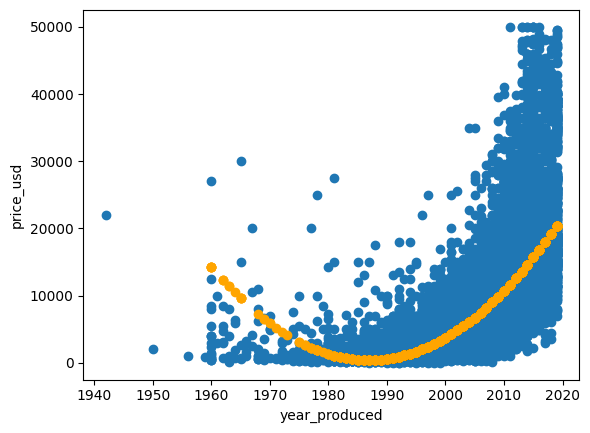

In [106]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Модель справилась весьма неплохо, теперь попробуем с регуляризациями.

Lasso.

In [107]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1}

MAE: 2490.829182914173
MSE: 17048525.944476634
RMSE: 4128.986067362862
MAPE: 0.8521679218203041
R^2: 0.5928613138602925


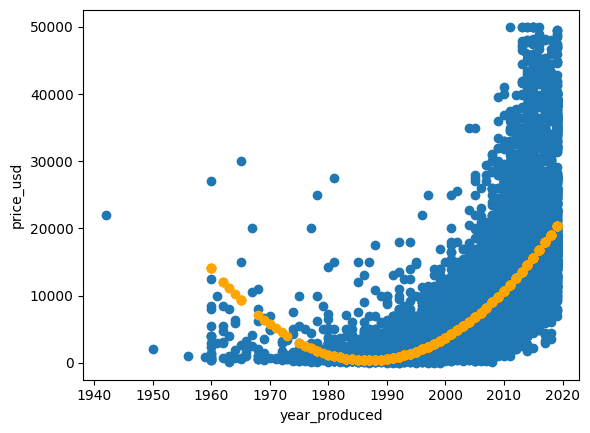

In [108]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Ridge.

In [109]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1}

MAE: 2492.712128242179
MSE: 17045810.974740755
RMSE: 4128.657284728384
MAPE: 0.8509742677480145
R^2: 0.5929261505045148


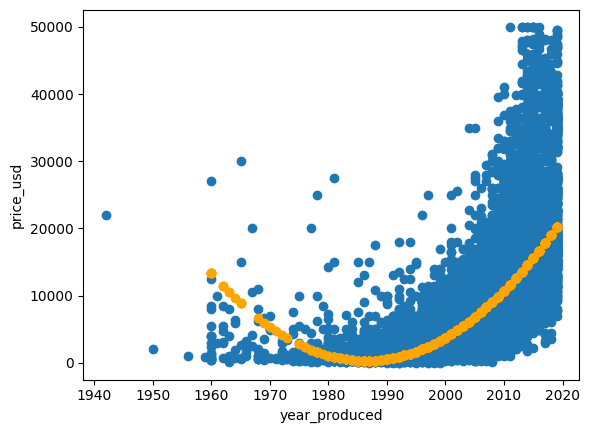

In [110]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

ElasticNet

In [111]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__alpha": [0.1, 1, 5, 10],
    "model__l1_ratio": np.arange(0.2, 1, 0.2),

}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(X_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.8}

MAE: 2942.1187260110637
MSE: 22394215.07910403
RMSE: 4732.252643203237
MAPE: 1.638743793350332
R^2: 0.465200021742036


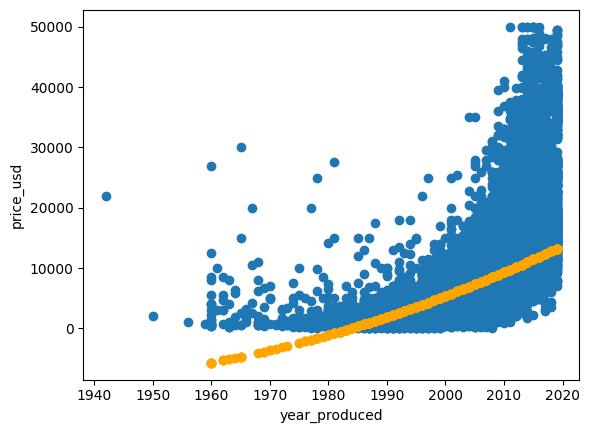

In [112]:
pipeline.set_params(**best_params).fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

plt.scatter(x, y)
plt.scatter(X_test, y_pred, c="orange")
plt.xlabel("year_produced")
plt.ylabel("price_usd")
plt.show()

Модель с ElasticNet справилась хуже остальных.

## **Выводы**

Лучше всего справилась модель множественной линейной регрессии без регуляризации и с регуляризациями lasso и ridge. Регуляризация ElasticNet показала себя хуже всего. Также неплохо справилась полиномиальная регрессия по предиктору year_produced, где регуляризация ElasticNet также ухудшила точность модели на тестовых данных.

## **Метрики**

In [113]:
from numpy.typing import ArrayLike
from typing import List, NamedTuple

class FormatResult(NamedTuple):
    predict: List[float]
    actual: List[float]

def format(predict: np.ndarray, actual: np.ndarray) -> FormatResult:
    """
    parameters
        predict - 1darray of predicted values (float or int) \n
        actual - 1-dimension DataFrame

    returns
        predict - iterable[float] \n
        actual - iterable[float]
    """
    pred = list(predict)
    act = []
    
    for _list in actual:  # actual.values contains lists which contains 1 element
        act.append(_list[0])

    return FormatResult(
        predict=pred,
        actual=act
    )

Отформатируем тренировочные и тестовые выборки для вызова функций

In [119]:
y_pred, y_test = format(np.array(y_pred), y_test)

Вызовем функции и сравним их результаты с встроенными в sklearn

In [123]:
def mae(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append(abs(actual - predict))
    return np.average(arr)


def mse(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append((actual - predict) ** 2)
    return np.average(arr)


def mape(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append(abs((actual - predict) / actual))
    return np.average(arr)


def r2(y_predict: List[float], y_actual: List[float]) -> float:
    if (len(y_predict) != len(y_actual)):
        print("Размерности векторов должны совпадать!")
        return 0
    m = len(y_predict)
    average_actual = np.average(y_actual)
    sst = 0  # Total Sum of Squares  (сумма квадратов отклонений от среднего)
    for actual in y_actual:
        sst += (actual - average_actual) ** 2
    return  float(1 - mse(y_predict, y_actual) * m / sst)


In [124]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My_MAE: {mae(y_predict=y_pred, y_actual=y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, My_MSE: {mse(y_predict=y_pred, y_actual=y_test)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}, My_RMSE: {sqrt(mse(y_predict=y_pred, y_actual=y_test))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}, My_MAPE: {mape(y_predict=y_pred, y_actual=y_test)}')
print(f'R^2: {pipeline.score(X_test, y_test)}, My_r2: {r2(y_predict=y_pred, y_actual=y_test)}')

MAE: 2942.1187260110637, My_MAE: 2942.1187260110637
MSE: 22394215.07910403, My_MSE: 22394215.07910403
RMSE: 4732.252643203237, My_RMSE: 4732.252643203237
MAPE: 1.638743793350332, My_MAPE: 1.638743793350332
R^2: 0.465200021742036, My_r2: 0.46520002174203223


## **Класс линейной регрессии**

Сделал матричным способом, но не все коэффициенты совпадают. Не понимаю, как задать функцию ошибок, чтобы нормально вычислить её градиент.

In [195]:
from numpy.typing import ArrayLike
from numpy.linalg import inv
from numpy import transpose, dot
from typing import Self, Any

class LinearRegression_:
    def __init__(self, n_iter: int = 10000, learning_rate: float = 0.01) -> None:  # Никакие аргументы тут не нужны, просто оставил как в примере, чтобы не искать потом
        self.w = []
        self.b = 0
        self.n_iter = n_iter
        self.learning_rate = learning_rate

    def fit(self, x: pd.DataFrame, y: pd.Series) -> Self:
        len = x.shape[0]
        ones = np.full((len), 1)
        x.insert(0, "ones", ones)
        self.w = dot(dot(inv(dot(transpose(x), (x))), transpose(x)), (y))
        self.b = self.w[0]
        self.w = self.w[1:]
        return self
    
    def predict(self, x: ArrayLike) -> Any:
        return dot(x, transpose(self.w))

In [196]:
y = data["price_usd"]
x = data.drop("price_usd", axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [198]:
lr = LinearRegression()
my_lr = LinearRegression_()

lr.fit(X_train, y_train)
my_lr.fit(X_train, y_train)

In [199]:
lr.coef_

array([-5.01118244e-03,  3.87612730e+02,  9.78537423e+02,  7.55861531e+01,
       -4.37925456e-01,  1.51604601e+00, -1.52970748e+03, -1.28620182e+03,
       -3.99573556e+02, -2.92674622e+02,  4.02030125e+02,  6.18816389e+02,
        2.81999380e+03,  1.85643862e+03,  1.48727157e+03,  5.56225726e+02,
        1.31905543e+02,  6.77695857e+02, -2.86740185e+02, -1.56455759e+02,
        2.67962740e+02, -1.49755527e+02,  6.87346233e+01, -2.47203081e+02,
        2.47203081e+02,  6.11843239e+02,  3.24670364e+02,  1.65909577e+02,
       -8.84760870e+01,  2.80586218e+03,  4.38278501e+02,  1.81482194e+03,
        5.05896261e+03,  4.45819670e+03,  1.25410136e+03,  4.60452853e+02,
        8.20985130e+02, -7.20823312e+01,  9.53996822e+03,  1.07962857e+04,
       -2.06741845e+03,  1.15150140e+03, -3.49993609e+02, -2.74104234e+02,
       -2.71676013e+01,  1.02125452e+03,  2.23917074e+03, -2.31893198e+02,
        3.18927862e+02, -7.01504478e+02,  4.18119216e+02,  7.29345553e+02,
        4.69646731e+01,  

In [200]:
my_lr.w

array([-3.70120604e-02, -6.70435642e+02,  2.11433953e+03,  6.82992477e+01,
       -1.65958168e+00,  8.42519655e-01, -3.75563700e+03, -2.79478050e+03,
       -1.21281468e+03, -3.57716783e+02,  4.99423623e+02,  1.45940512e+03,
        5.26748726e+03,  3.96318269e+03,  2.66869189e+03,  1.11557994e+03,
        4.83073031e+01,  1.17603787e+03,  1.41733397e+02,  2.11273384e+02,
        3.39818488e+02, -4.72795031e+02, -1.45910400e+02, -1.47989302e+16,
       -1.47989302e+16,  7.68238264e+02,  5.39132527e+02,  4.06494304e+02,
        2.79264927e+01,  2.92095347e+05,  2.92782223e+05,  2.93031790e+05,
       -2.88359223e+05,  4.45819670e+03,  1.25410136e+03,  4.60452853e+02,
        8.20985130e+02, -7.20823312e+01,  9.53996822e+03,  1.07962857e+04,
       -2.06741845e+03,  1.15150140e+03, -3.49993609e+02, -2.74104234e+02,
       -2.71676013e+01,  1.02125452e+03,  2.23917074e+03, -2.31893198e+02,
        3.18927862e+02, -7.01504478e+02,  4.18119216e+02,  7.29345553e+02,
        4.69646731e+01,  

## **Метрики - вопрос про импорт**

In [201]:
from exceptions import MetricError
from metrics import mae  # Вопрос!!! Как импортировать файлы из других папок, а не только из той, в которой лежит блокнот?

In [202]:
def mae(y_predict, y_actual):
    if (len(y_predict) != len(y_actual)):
        # raise MetricError()
        print("Не совпадают размерности")
    
    arr = []
    for i, predict in enumerate(y_predict):
        actual = y_actual[i]
        arr.append(abs(actual - predict))
    return arr

In [203]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My_MAE: {mae(y_actual=y_test, y_predict=y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(X_test, y_test)}')

TypeError: 'int' object is not callable